In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.models import Sequential
from keras.layers import dense_attention

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('neo.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df.shape

(90836, 10)

In [4]:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
print(f'Duplicate Data are:  {df.duplicated().sum()}%')

Duplicate Data are:  0%


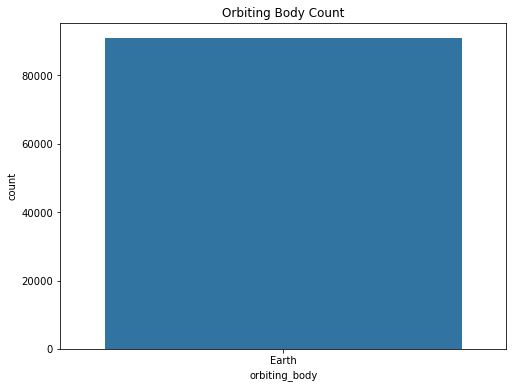

In [8]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'orbiting_body', data = df)
plt.title("Orbiting Body Count")
plt.show()

In [9]:
X = df.drop(['id','name','est_diameter_max','orbiting_body','sentry_object',"hazardous"], axis = 1)
y = df['hazardous'].astype('int')
# print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# KNeighbors Classifier

In [10]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
y_probs = knn.predict_proba(X_test)[:,1]
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(f1_score(y_test, y_preds))
print(roc_auc_score(y_test, y_preds))

0.2034764826175869
0.07498116051243406
0.10958149779735682
0.5216553157930711


In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     24597
           1       0.20      0.07      0.11      2654

    accuracy                           0.88     27251
   macro avg       0.56      0.52      0.52     27251
weighted avg       0.84      0.88      0.86     27251



In [12]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_probs))

0.5628319390258993


In [14]:
from sklearn.model_selection import cross_val_score
def cross_val():
    print('Cross Validation with 5 folds')
    print(f"ROC AUC Score: {round(cross_val_score(knn, X, y, cv = 5, scoring = 'roc_auc').mean(),2)}")
    print(f"Precision Score: {round(cross_val_score(knn, X,y,cv = 5, scoring = 'precision').mean(),2)}")
    print(f"Recall: {round(cross_val_score(knn, X,y, cv= 5,  scoring = 'recall').mean(),2)}")
    print(f"F1 score: {round(cross_val_score(knn, X, y, cv = 5, scoring ='f1').mean(),2)}")
cross_val()

Cross Validation with 5 folds
ROC AUC Score: 0.55
Precision Score: 0.17
Recall: 0.06
F1 score: 0.09


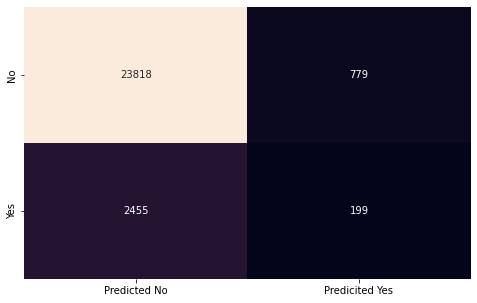

In [23]:
def heatmap():
    plt.figure(figsize=(8,5))
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot = True, fmt = 'd', cbar = False, xticklabels= ["Predicted No", "Predicited Yes"], yticklabels=["No", "Yes"])
    plt.show()
heatmap()

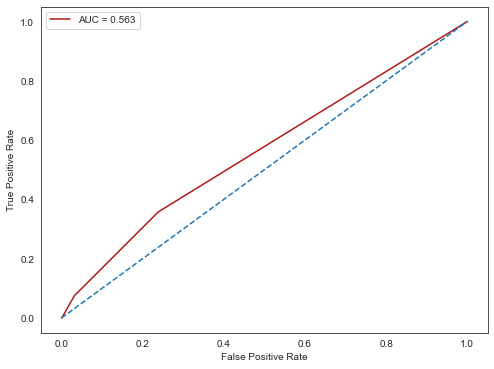

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc  = auc(fpr, tpr)
sns.set_style("white")
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr,  color = '#b01717',label = "AUC = %0.3f" % roc_auc)
plt.plot([0,1],[0,1], linestyle = "--")
plt.legend(loc = "upper left")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.axis("tight")
plt.show()

# Random Forest Classifer

In [42]:
rfs = RandomForestClassifier()
rfs.fit(X_train, y_train)
y_pred = rfs.predict(X_test)
y_prob = rfs.predict_proba(X_test)[:,1]

In [44]:
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.6058394160583942
0.46347138203815735
0.3752825923134891
0.6744689580667337


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     24597
           1       0.61      0.38      0.46      2654

    accuracy                           0.92     27251
   macro avg       0.77      0.67      0.71     27251
weighted avg       0.90      0.92      0.91     27251



In [46]:
print(f"Roc AUC Score: {round(roc_auc_score(y_test, y_prob),3)}")

Roc AUC Score: 0.93


In [51]:
print("Cross Valid Score with 5 folds")
print(f"Roc Auc: {round(cross_val_score(rfs, X, y, cv = 5, scoring = 'roc_auc').mean(),2)}")
print(f"Precison Score: {round(cross_val_score(rfs, X,y, cv = 5, scoring= 'precision').mean(),2)}")
print(f"F1 Score: {round(cross_val_score(rfs, X,y,cv = 5, scoring = 'f1').mean(),2)}")
print(f"Recall Score: {round(cross_val_score(rfs, X,y, cv = 5, scoring = 'recall').mean(),2)}")

Cross Valid Score with 5 folds
Roc Auc: 0.93
Precison Score: 0.6
F1 Score: 0.46
Recall Score: 0.38


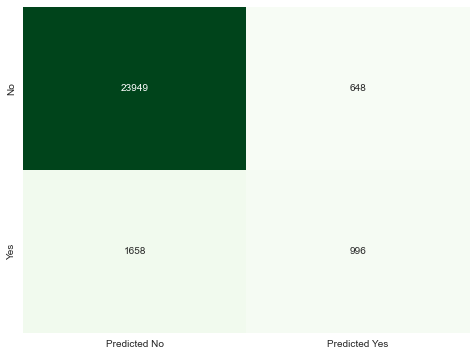

In [57]:
plt.figure(figsize = (8,6))
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = "Greens", cbar = False, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=["No", "Yes"])
plt.show()

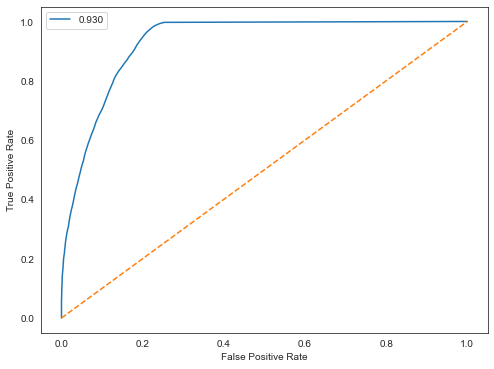

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = '%0.3f'% roc_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.axis("tight")
plt.legend()
plt.show()

# Decision Tree Classifier

In [60]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_probs = dtc.predict_proba(X_test)[:,1]

In [62]:
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.4541116005873715
0.4600223131275567
0.4660889223813112
0.7028171977032384


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24597
           1       0.45      0.47      0.46      2654

    accuracy                           0.89     27251
   macro avg       0.70      0.70      0.70     27251
weighted avg       0.89      0.89      0.89     27251



In [67]:
print(f"Roc Auc Score: {round(roc_auc_score(y_test, y_probs),3)}")

Roc Auc Score: 0.703


In [70]:
print("Cross Validation with 5 Folds")
print(f"Roc Auc Score: {round(cross_val_score(dtc, X,y, cv = 5, scoring = 'roc_auc').mean(),2)}")
print(f"Precision Score: {round(cross_val_score(dtc, X,y, cv = 5, scoring = 'precision').mean(),2)}")
print(f"F1 Score: {round(cross_val_score(dtc, X,y, cv = 5, scoring = 'f1').mean(),2)}")
print(f"Recall Score: {round(cross_val_score(dtc, X,y ,cv = 5, scoring = 'recall').mean(),2)}")

Cross Validation with 5 Folds
Roc Auc Score: 0.69
Precision Score: 0.44
F1 Score: 0.44
Recall Score: 0.44


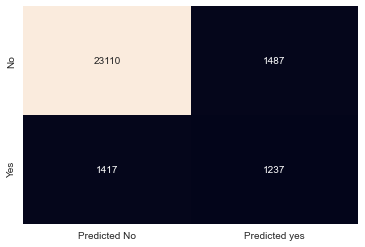

In [72]:
plt.figure(figsize = (6,4))
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot = True, cbar = False, fmt = 'd', xticklabels=["Predicted No", "Predicted yes"], yticklabels= ["No", "Yes"])
plt.show()

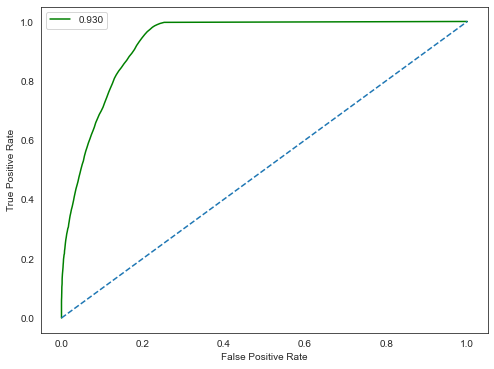

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = "green", label = "%0.3f"% roc_auc)
plt.plot([0,1],[0,1], linestyle = "--")
plt.axis("tight")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Naive Bayes (Gaussian NB)

In [75]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_probs = nb.predict_proba(X_test)[:,1]

In [80]:
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

1.0
1.0
1.0
1.0


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26961
           1       1.00      1.00      1.00       290

    accuracy                           1.00     27251
   macro avg       1.00      1.00      1.00     27251
weighted avg       1.00      1.00      1.00     27251



In [82]:
print(f"Roc Auc Score: {round(roc_auc_score(y_test, y_probs))}")

Roc Auc Score: 1


In [84]:
print("Cross Validation with 5 folds")
print(f"Roc Auc Score: {round(cross_val_score(nb, X, y, cv = 5, scoring = 'roc_auc').mean(),2)}")
print(f"F1 Score: {round(cross_val_score(nb, X,y, cv = 5, scoring = 'f1').mean(),2)}")
print(f"Recall Score: {round(cross_val_score(nb, X,y ,cv = 5, scoring = 'recall').mean(),2)}")
print(f"Precision: {round(cross_val_score(nb, X,y, cv= 5, scoring = 'precision').mean(),2)}")

Cross Validation with 5 folds
Roc Auc Score: 0.67
F1 Score: 0.07
Recall Score: 0.04
Precision: 0.29


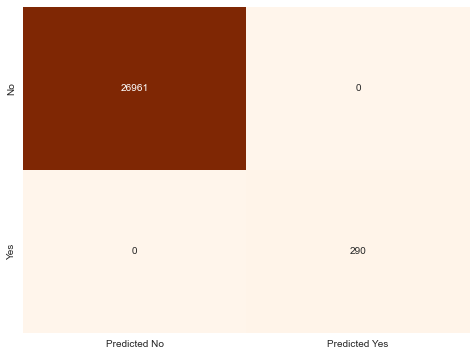

In [88]:
plt.figure(figsize =(8,6))
cm3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm3, annot = True, cbar = False, fmt = 'd', cmap = "Oranges", xticklabels = ["Predicted No", "Predicted Yes"], yticklabels=["No", "Yes"])
plt.show()

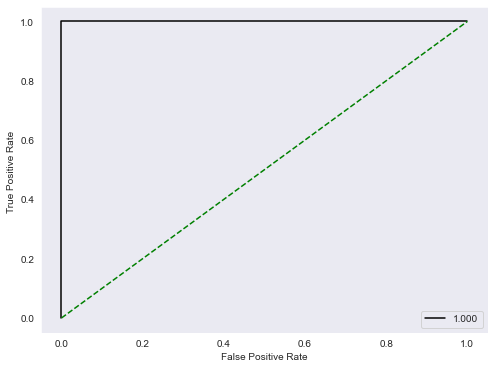

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
sns.set_style("dark")
plt.plot(fpr, tpr, color = "black", label = '%0.3f'% roc_auc)
plt.plot([0,1],[0,1], color = "green", linestyle = "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.axis("tight")
plt.legend()
plt.show()

# Neural Network

In [ ]:
model = Sequential()
